<div style="text-align:center; color:white; padding:10pt; background-color:teal"><h1>Predictive Modeling Coded Project</h1>
    <h3>- Haraprasad Dhal</h3>
    <div>
<hr style="height:4px;border-width:0;color:gray;background-color:white">

<h3 style="text-align:center;color:white; padding:10pt; background-color:teal"><b>Business context and objective:</b></h3>


<p>
    OTT (Over-the-Top) media services deliver content directly via the internet, bypassing traditional TV. This model offers convenience and flexibility, contributing to rapid market growth. Valued at \$121.61 billion in 2019, the OTT market is expected to reach $1,039.03 billion by 2027, growing at a 29.4% annual rate. The COVID-19 pandemic accelerated this trend, increasing OTT consumption by 46% as audiences sought more at-home entertainment.

To enhance viewer engagement, it’s crucial to understand what drives first-day content viewership. Factors influencing this may include platform traffic fluctuations, marketing investment levels, scheduling conflicts, and variations due to weekends and holidays. Identifying these drivers will help us refine strategies to boost engagement and address viewership declines.

Our plan involves developing a linear regression model to analyze historical data and uncover the key factors affecting first-day viewership. This analysis will provide actionable insights to improve content performance and subscriber retention. By addressing issues such as reduced marketing spend or changes in platform traffic, we aim to enhance overall platform engagement and maintain strong growth in the competitive OTT market.
</p>

<h3 style="text-align:center;color:white; padding:10pt; background-color:teal"><b>EDA:</b></h3>

In [716]:
# Import required libraries
#data handling
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# For randomized data splitting
from sklearn.model_selection import train_test_split
# To build linear regression_model
import statsmodels.api as sm
# To check model performance of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
df=pd.read_csv('ottdata.csv')
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


<p>Data dictionary description</p>

<ol>
<li>visitors: Average number of visitors, in millions, to the platform in the past week
<li>ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
<li>major_sports_event: Any major sports event on the day
<li>genre: Genre of the content
<li>dayofweek: Day of the release of the content
<li>season: Season of the release of the content
<li>views_trailer: Number of views, in millions, of the content trailer
<li>views_content: Number of first-day views, in millions, of the content
</ol>

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [50]:
df.shape

(1000, 8)

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


In [54]:
df['dayofweek'].unique()

array(['Wednesday', 'Friday', 'Sunday', 'Thursday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [56]:
df['season'].unique()

array(['Spring', 'Fall', 'Winter', 'Summer'], dtype=object)

In [58]:
df['genre'].unique()

array(['Horror', 'Thriller', 'Sci-Fi', 'Others', 'Drama', 'Action',
       'Comedy', 'Romance'], dtype=object)

In [427]:
df['major_sports_event'].unique()

array([0, 1], dtype=int64)

No irrebularities in categorical values found

In [430]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [62]:
df.duplicated().sum()

0

There are no missing/null values also all the records are unique.

<div style="text-align:center;"><b>Univariate Analysis</b></div>

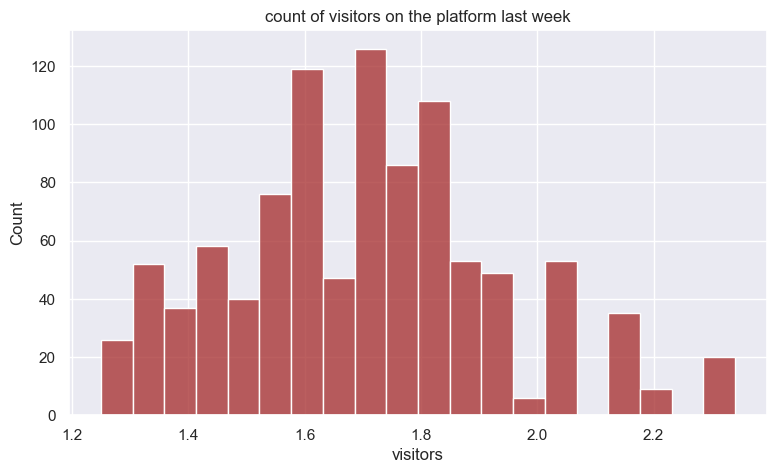

In [648]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='visitors',color='brown')
plt.title('count of visitors on the platform last week')
plt.savefig('visit_dist.png',dpi=400)
plt.show()

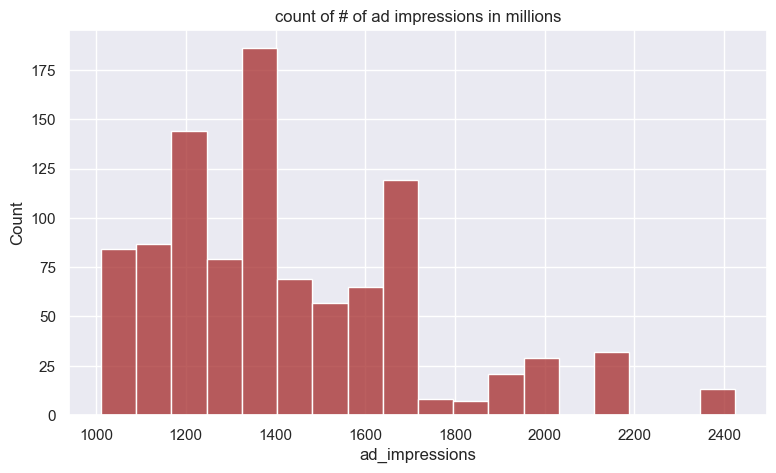

In [650]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='ad_impressions',color='brown')
plt.title('count of # of ad impressions in millions')
plt.savefig('adimpressions_dist.png',dpi=400)
plt.show()

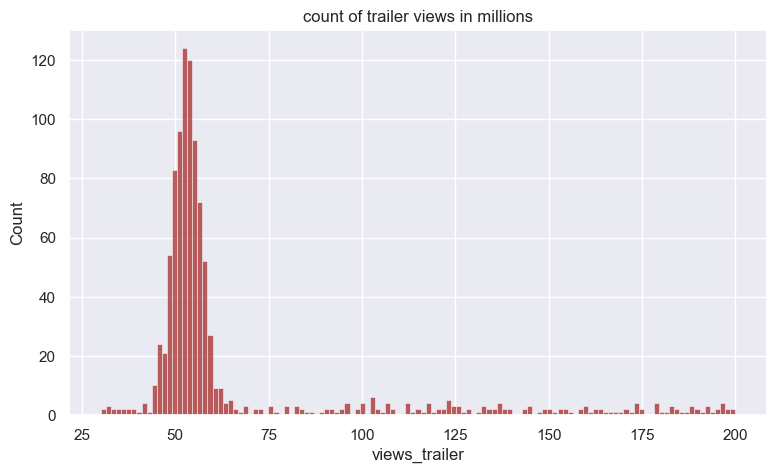

In [652]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='views_trailer',color='brown')
plt.title('count of trailer views in millions')
plt.savefig('trailer_views_dist.png',dpi=400)
plt.show()

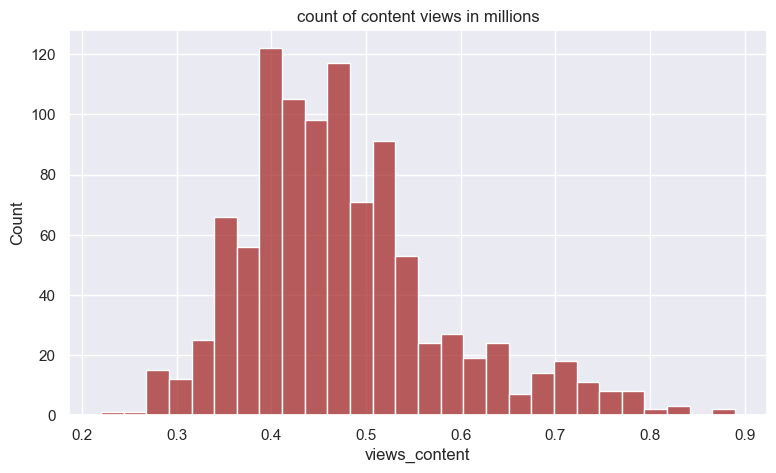

In [654]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='views_content',color='brown')
plt.title('count of content views in millions')
plt.savefig('content_views_dist.png',dpi=400)
plt.show()

<b>Lets Check for outliers</b>

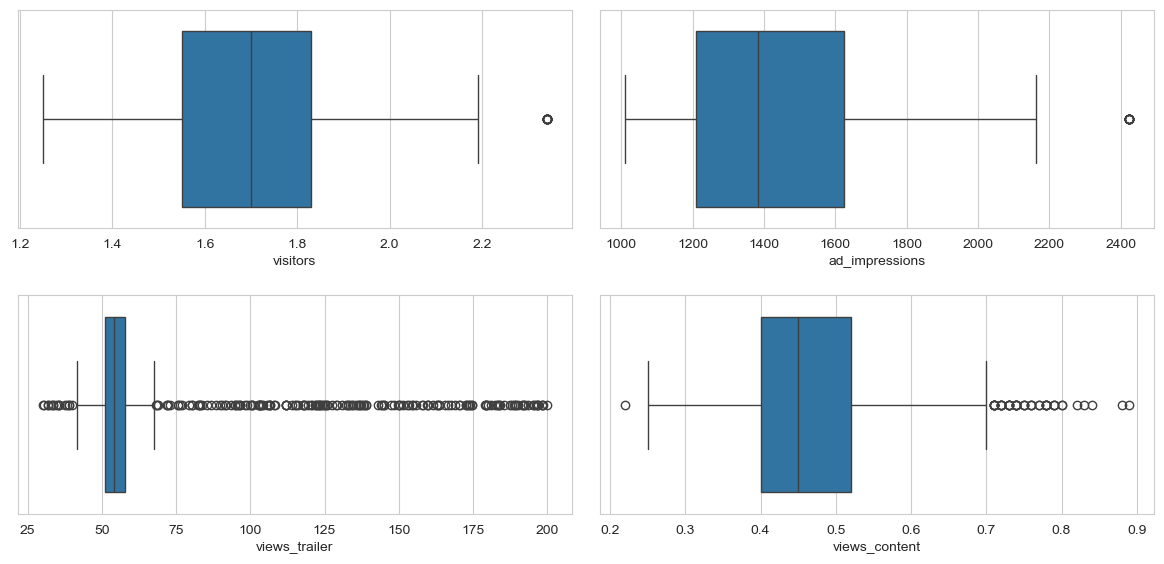

In [231]:
numerical_cols=['visitors', 'ad_impressions', 'views_trailer', 'views_content']
plt.figure(figsize=(12, 6))
for i, variable in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

We observe that there are presence of outliers in all numerical columns. Yet we will keep all of them since they are valid values recorded for each observaion.

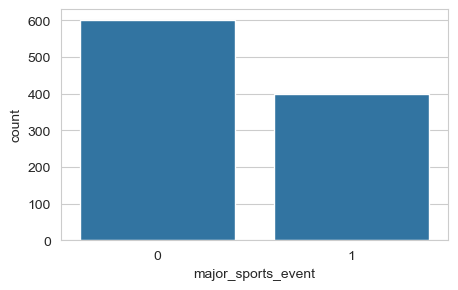

In [158]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='major_sports_event')
plt.show()

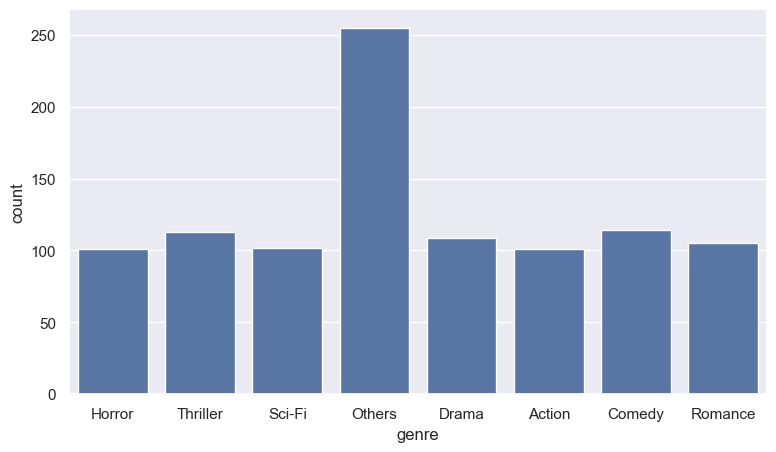

In [662]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='genre')
plt.savefig('genre_dist.png',dpi=400)
plt.show()

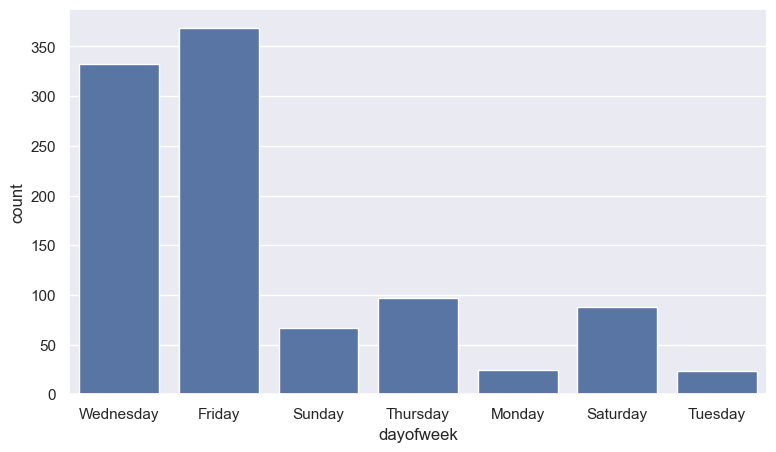

In [656]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='dayofweek')
plt.savefig('dayofweek.png',dpi=400)
plt.show()

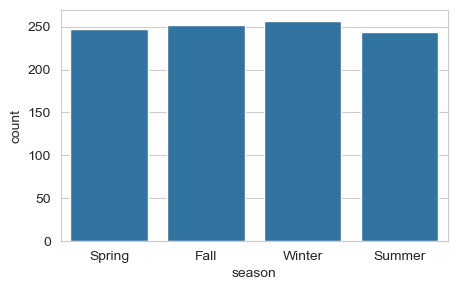

In [164]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='season')
plt.show()

<div style="text-align:center;"><b>Bivariate and Multivariate Analysis</b></div>

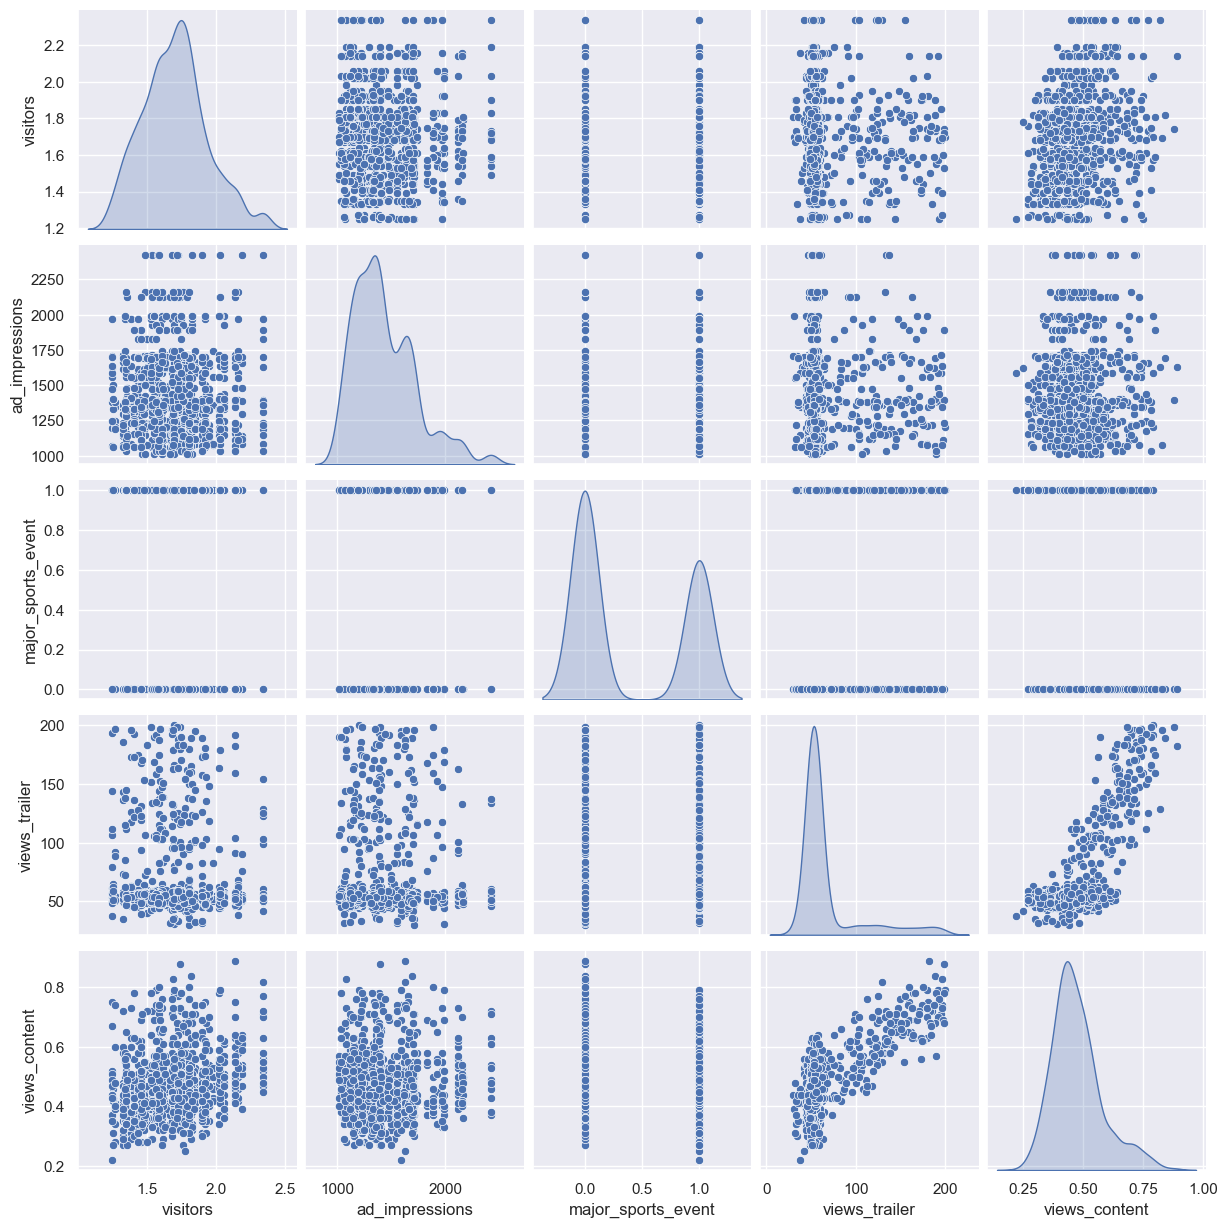

In [89]:
sns.pairplot(data=df,diag_kind="kde")
plt.show()

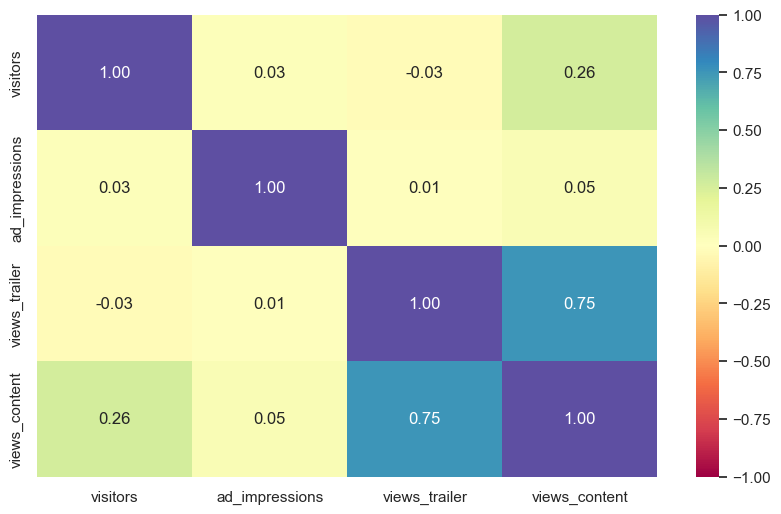

In [700]:
num_cols=['visitors', 'ad_impressions', 'views_trailer', 'views_content']
plt.figure(figsize=(10, 6))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.savefig('corr.png',dpi=400)
plt.show()

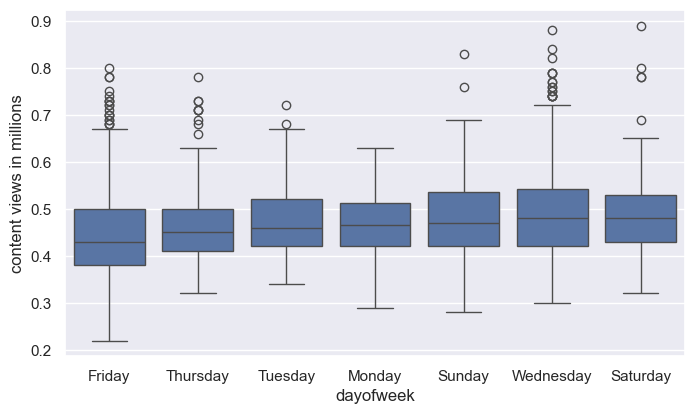

In [666]:
order={}
for day in df["dayofweek"].unique():
    m=df[df["dayofweek"]==day]["views_content"].median()
    order[day]=m
order=sorted(order.items(), key=lambda x: x[1])


plt.figure(figsize=(8,4.5))
sns.boxplot(data=df,x='dayofweek',y='views_content',order=[x[0] for x in order])
plt.ylabel('content views in millions')
plt.savefig('content_views_vs_dayofweek.png',dpi=400)
plt.show()

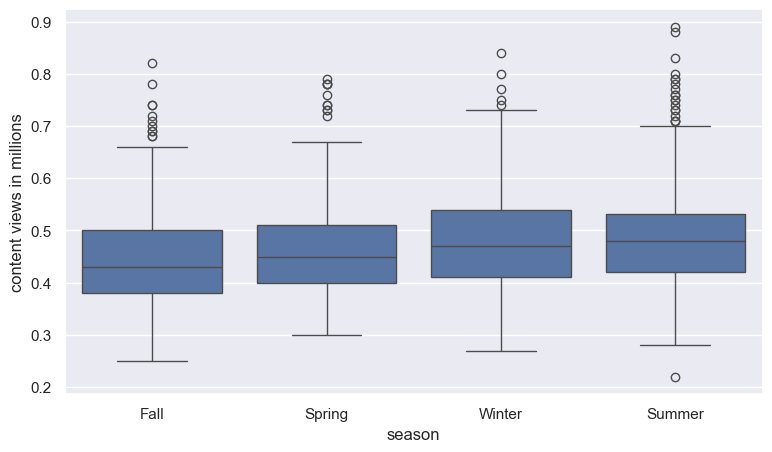

In [676]:
order={}
for s in df["season"].unique():
    m=df[df["season"]==s]["views_content"].median()
    order[s]=m
order=sorted(order.items(), key=lambda x: x[1])

plt.figure(figsize=(9,5))
sns.boxplot(data=df,x='season',y='views_content',order=[x[0] for x in order])
plt.ylabel('content views in millions')
plt.savefig('content_views_vs_season.png',dpi=400)
plt.show()

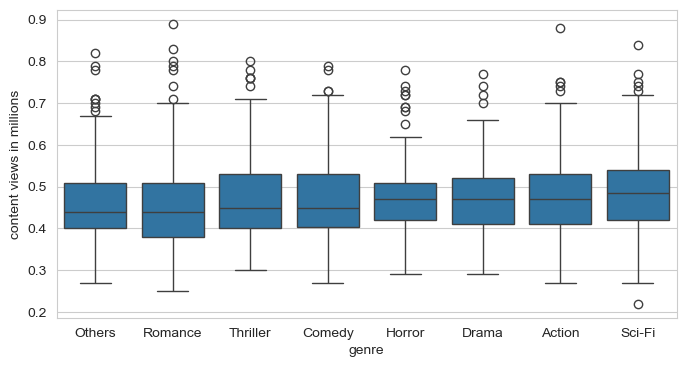

In [574]:
order={}
for g in df["genre"].unique():
    m=df[df["genre"]==g]["views_content"].median()
    order[g]=m
order=sorted(order.items(), key=lambda x: x[1])

plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='genre',y='views_content',order=[x[0] for x in order])
plt.ylabel('content views in millions')
plt.show()

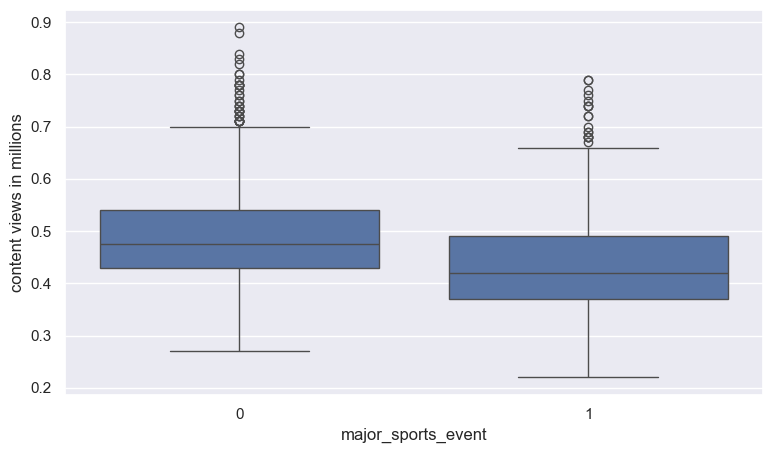

In [670]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df,x='major_sports_event',y='views_content')
plt.ylabel('content views in millions')
plt.savefig('major_sports_event_vs_content_views.png',dpi=400)
plt.show()

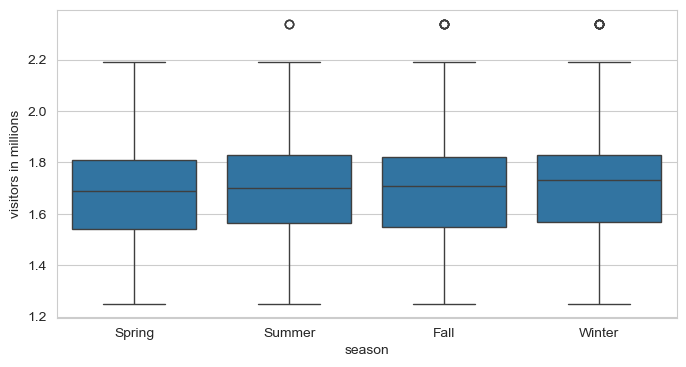

In [586]:
order={}
for g in df["season"].unique():
    m=df[df["season"]==g]["visitors"].median()
    order[g]=m
order=sorted(order.items(), key=lambda x: x[1])

plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='season',y='visitors',order=[x[0] for x in order])
plt.ylabel('visitors in millions')
plt.show()

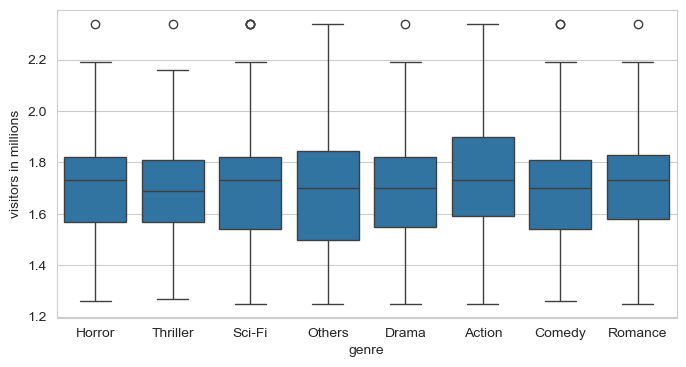

In [580]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='genre',y='visitors')
plt.ylabel('visitors in millions')
plt.show()

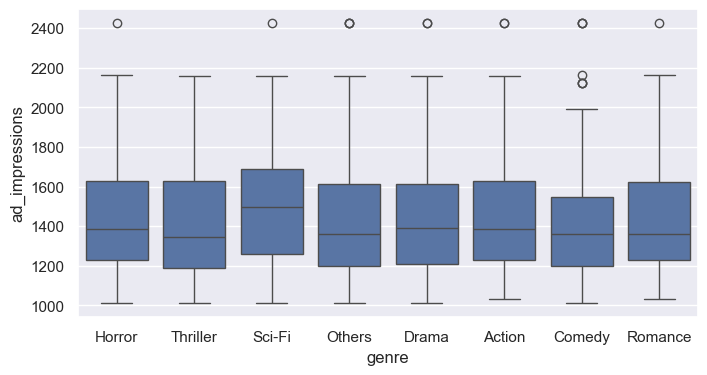

In [105]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='genre',y='ad_impressions')
plt.show()

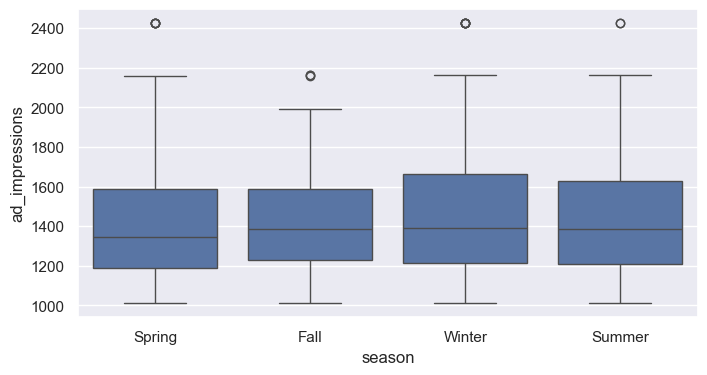

In [107]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='season',y='ad_impressions')
plt.show()

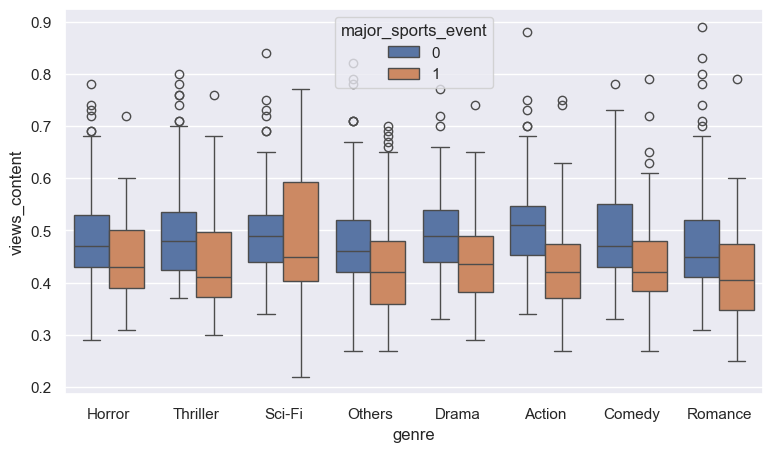

In [672]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df,x='genre',y='views_content',hue='major_sports_event')
plt.savefig('views_count_sports_event_genre.png',dpi=400)
plt.show()

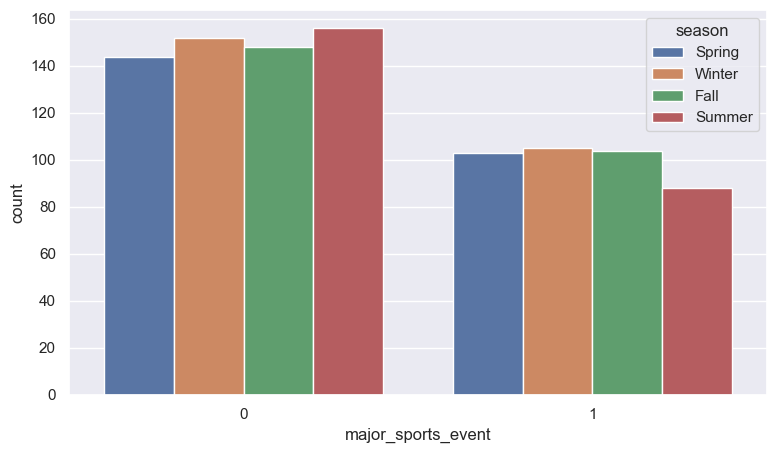

In [741]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='major_sports_event',hue='season')
plt.savefig('sports_vs_season.png',dpi=400)
plt.show()

<h3 style="text-align:center;color:white; padding:10pt; background-color:teal"><b>Data and regression model preparation</b></h3>

In [110]:
# encoding for categorical variables by creating dummy variables for them
df1 = pd.get_dummies(df, columns=['genre','dayofweek', 'season'], drop_first=True)
df1.head()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0,56.70,0.51,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.46,1498.41,1,52.69,0.32,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.47,1079.19,1,48.74,0.39,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.85,1342.77,1,49.81,0.44,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.46,1498.41,0,55.83,0.46,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [112]:
# defining X and y variables for 
# independent and dependent vaiable respectively
X = df1.drop(["views_content"], axis=1)
y = df1["views_content"]


In [185]:
# lets convert all input variables into floats
X = X.astype(float)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [187]:
y.head()

0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64

In [189]:
# let's add the intercept to data
X = sm.add_constant(X)

In [245]:
# split dataset into training and test  in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [247]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


In [249]:
X_train.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
731,1.0,1.64,1992.53,0.0,49.62,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
716,1.0,1.69,2158.03,0.0,132.93,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
640,1.0,1.47,1229.35,0.0,54.13,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
804,1.0,1.49,1010.87,0.0,106.62,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
737,1.0,2.19,1119.90,0.0,52.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [197]:
X_test.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
507,1.0,1.58,1323.74,0.0,57.85,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
818,1.0,1.54,2122.33,0.0,56.82,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
452,1.0,1.82,1152.29,0.0,165.58,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,1.0,2.03,1145.37,0.0,59.99,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
242,1.0,1.75,1060.86,0.0,58.99,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [199]:
y_train.head()

731    0.40
716    0.70
640    0.42
804    0.55
737    0.59
Name: views_content, dtype: float64

In [201]:
# function to compute adjusted R-squared

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100
    
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    # model: regressor
    # predictors: independent variables
    # target: dependent variable

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )
    return df_perf

In [203]:
# fit into linear model
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [205]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sat, 07 Sep 2024   Prob (F-statistic):          1.32e-215
Time:                        13:20:33   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

In [218]:
# let's check performance of the model on training set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsres, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


#### Interpretation of p-values (P > |t|)

* For each predictor variable there is a null hypothesis and alternate hypothesis.


    - Null hypothesis : Predictor variable is not significant 
    - Alternate hypothesis : Predictor variable is significant


* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

* However, due to the possible presence of multicollinearity in our data, the p-values may also change.

* Let's ensure that there is no multicollinearity in order to interpret the p-values.

#### check for multicollinearity
* **General Rule of Thumb**:

    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                  99.679317
visitors                1.027837
ad_impressions          1.029390
major_sports_event      1.065689
views_trailer           1.023551
genre_Comedy            1.917635
genre_Drama             1.926699
genre_Horror            1.904460
genre_Others            2.573779
genre_Romance           1.753525
genre_Sci-Fi            1.863473
genre_Thriller          1.921001
dayofweek_Monday        1.063551
dayofweek_Saturday      1.155744
dayofweek_Sunday        1.150409
dayofweek_Thursday      1.169870
dayofweek_Tuesday       1.062793
dayofweek_Wednesday     1.315231
season_Spring           1.541591
season_Summer           1.568240
season_Winter           1.570338
dtype: float64



<ol>
<li>Ignoring the intercept and dummy variables
</li>
    <li>All the variables have VIF value less than 5. </li>
    <li>We therefore do not have multicollinearity problem in this dataset</li>
</ol>

In [267]:
# ad_impression has significance level much geater than 0.05
# let's try a model without it

X_train1 = X_train.drop(["ad_impressions"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sat, 07 Sep 2024   Prob (F-statistic):          1.29e-216
Time:                        16:10:13   Log-Likelihood:                 1124.5
No. Observations:                 700   AIC:                            -2209.
Df Residuals:                     680   BIC:                            -2118.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0652    

In [314]:
# let's check performance of the model on training set
print("Training Performance\n")
olsmodel_1_train_perf = model_performance_regression(olsres_1, X_train1, y_train)
olsmodel_1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048541,0.038167,0.791523,0.785382,8.549936


In [269]:
# genres have significance level much geater than 0.05
# let's try a model without them as well.

genres=[]
for i in df1.columns:
    if i[0:5]=='genre':
        genres.append(i)
        
X_train2 = X_train.drop(genres, axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     198.5
Date:                Sat, 07 Sep 2024   Prob (F-statistic):          2.80e-222
Time:                        16:10:16   Log-Likelihood:                 1122.0
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     686   BIC:                            -2152.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0689    

In [316]:
# let's check performance of the model on training set
print("Training Performance\n")
olsmodel_2_train_perf = model_performance_regression(olsres_2, X_train2, y_train)
olsmodel_2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048715,0.038302,0.790029,0.785737,8.579573


In [271]:
# lets remove genres , ad_impressions and daysofweek_tuesday together.

drop=[]
for i in df1.columns:
    if i[0:5]=='genre' or i=='ad_impressions' or i=='dayofweek_Tuesday':
        drop.append(i)
        
X_train3 = X_train.drop(drop, axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())


                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sat, 07 Sep 2024   Prob (F-statistic):          7.03e-224
Time:                        16:10:18   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [318]:
# let's check performance of the model on training set
print("Training Performance\n")
olsmodel_3_train_perf = model_performance_regression(olsres_3, X_train3, y_train)
olsmodel_3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


<br>
<b>For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity 
2. Independence 
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

In [274]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_3.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_3.resid.values  # residuals

df_pred.head()



,Actual Values,Fitted Values,Residuals
0,0.40,0.445434,-0.045434
1,0.70,0.677403,0.022597
2,0.42,0.433999,-0.013999
3,0.55,0.562030,-0.012030
4,0.59,0.547786,0.042214


<b>Linearity and Inpependence check

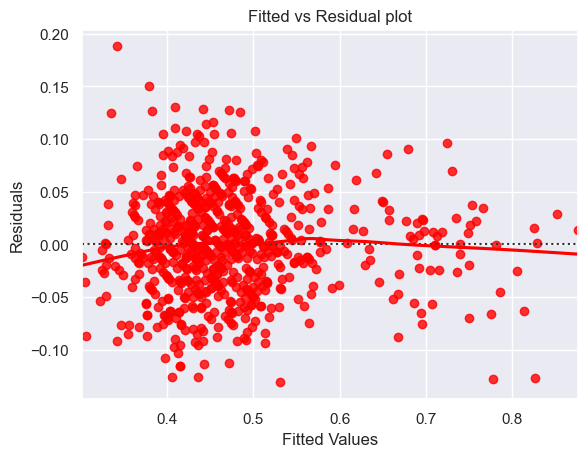

In [737]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="red", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.savefig('Fitted_vs_Residual.png',dpi=400)
plt.show()

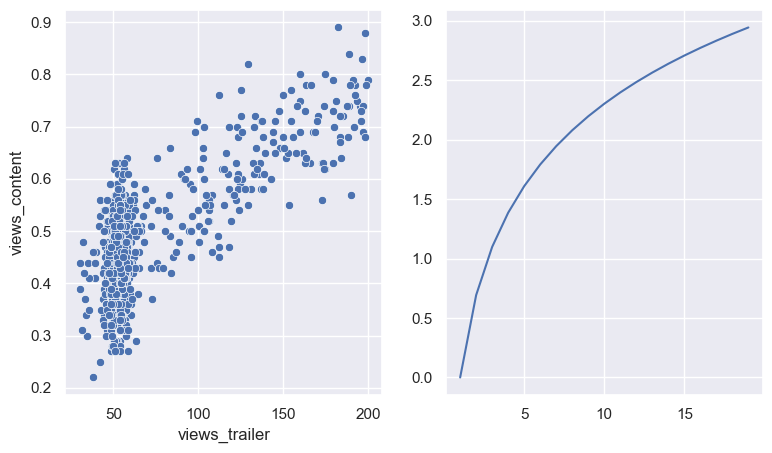

In [743]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df1,x="views_trailer",y="views_content")
plt.subplot(1,2,2)
plt.plot(np.arange(1,20,1),np.log(np.arange(1,20,1)))
plt.savefig('log_compare.png',dpi=400)
plt.show()

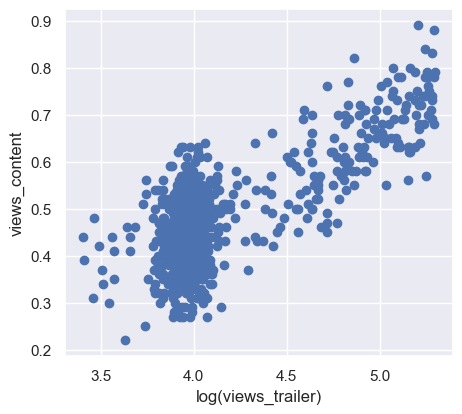

In [745]:
plt.figure(figsize=(5,4.5))
plt.scatter(np.log(df1['views_trailer']),df1['views_content'])
plt.xlabel("log(views_trailer)")
plt.ylabel("views_content")
plt.savefig('log_trailer.png',dpi=400)
plt.show()

In [356]:
# let's try another model with this log transformation
X_train_log=X_train3.copy()
X_train_log['log_views_trailer']=np.log(X_train_log['views_trailer'])
X_train_log.drop(['views_trailer'],axis=1)
X_train_log.columns

olsmod_log = sm.OLS(y_train, X_train_log)
olsres_log = olsmod_log.fit()
print(olsres_log.summary())

print("Training Performance\n")
olsmodel_log_train_perf = model_performance_regression(olsres_log, X_train_log, y_train)
olsmodel_log_train_perf

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sat, 07 Sep 2024   Prob (F-statistic):          1.16e-224
Time:                        19:44:16   Log-Likelihood:                 1124.8
No. Observations:                 700   AIC:                            -2224.
Df Residuals:                     687   BIC:                            -2164.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2408    

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048518,0.038102,0.791726,0.787779,8.515847


Since R -squared value has not improved significantly, we will not consider this model with log transformation. We will go with the olsmodel_3 
as the final model for our analysis.

<b>check for normality of residuals</b>

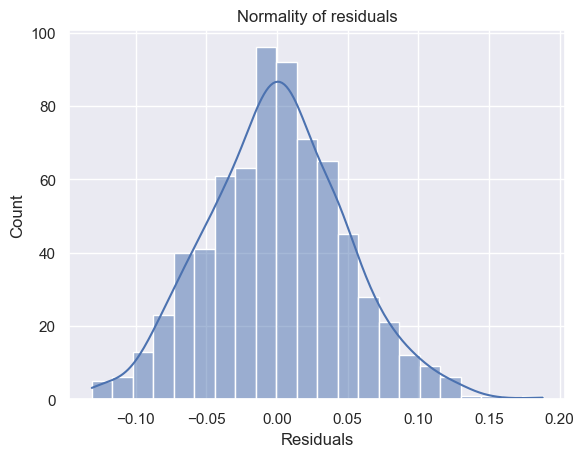

In [730]:
# check for normality of residuals
# plt.figure(figsize=(10,6))
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.savefig('normality_residuals.png',dpi=400)
plt.show()

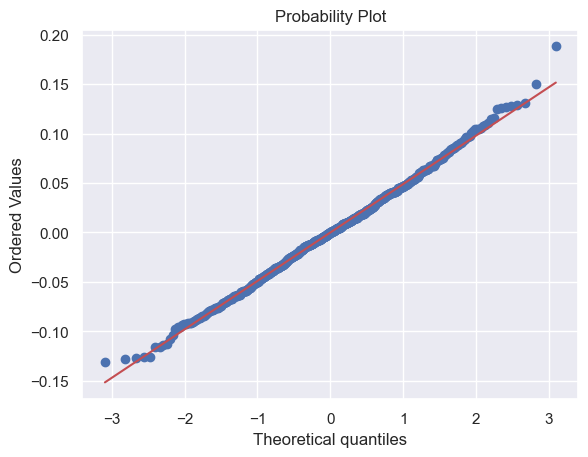

In [732]:
import pylab
import scipy.stats as stats
# plt.figure(figsize=(10,6))
stats.probplot(df_pred["Residuals"], dist="norm",plot=pylab)
plt.savefig('QQ_plot.png',dpi=400)
plt.show()

In [103]:
# Shapiro-Wilk test 
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9973143339157104, pvalue=0.3104695975780487)

<b>TEST FOR HOMOSCEDASTICITY

In [286]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.131361290420075), ('p-value', 0.12853551819087372)]

<div style="text-align:center;color:white; padding:2pt; background-color:teal"><h3><b>Performance and Prediction on Test Data</h3>
</div>

All the assumptions on linear rgression are satisfied. Lets check performnce on test data.

In [468]:
# predictions on the test set
# We will use the third model for prediction
drop=[]
for i in df1.columns:
    if i[0:5]=='genre' or i=='ad_impressions' or i=='dayofweek_Tuesday':
        drop.append(i)
        
X_test3 = X_test.drop(drop, axis=1)
pred = olsres_3.predict(X_test3)
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155


In [474]:
# lets create final model
X_train_final = X_train3.copy()
X_test_final = X_test3.copy()
olsmodel_final = sm.OLS(y_train, X_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 08 Sep 2024   Prob (F-statistic):          7.03e-224
Time:                        01:32:28   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [734]:
# final model performance on test data
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, X_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


In [484]:
#lets write the final equation for the linear model
Equation = "content views ="
print(Equation, end=" ")
for i in range(len(X_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end="\n ");
    elif i != len(X_train_final.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            X_train_final.columns[i],
            ")",
            "+",
            end=" \n ",
        );
    else:
        print(olsmodel_final.params[i], "* (", X_train_final.columns[i], ")");

content views = 0.07467052053721349 +
 0.129095818258941 * ( visitors ) + 
 -0.060555078181373276 * ( major_sports_event ) + 
 0.0023308167861640127 * ( views_trailer ) + 
 0.032065806790236344 * ( dayofweek_Monday ) + 
 0.0570285966016511 * ( dayofweek_Saturday ) + 
 0.03438622992362495 * ( dayofweek_Sunday ) + 
 0.015449441769973173 * ( dayofweek_Thursday ) + 
 0.046494803669848164 * ( dayofweek_Wednesday ) + 
 0.02260491581811801 * ( season_Spring ) + 
 0.04339100263609974 * ( season_Summer ) + 
 0.028230557183976785 * ( season_Winter )


C:\Users\USER - PC\AppData\Local\Temp\ipykernel_8464\3316520700.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsmodel_final.params[i], "+", end="\n ");
C:\Users\USER - PC\AppData\Local\Temp\ipykernel_8464\3316520700.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  olsmodel_final.params[i],
C:\Users\USER - PC\AppData\Local\Temp\ipykernel_8464\3316520700.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsmod